In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [3]:
data = pd.read_csv("student_feedback.csv")
data

NameError: name 'pd' is not defined

In [3]:
#print("Shape:", data.shape)
data['new_data']=data['person_income'].apply(lambda X:X*2)

In [4]:
#print(data.head())
print(data.new_data)

0        118000
1         19200
2         19200
3        131000
4        108800
          ...  
32576    106000
32577    240000
32578    152000
32579    300000
32580     84000
Name: new_data, Length: 32581, dtype: int64


In [5]:
print(data.info())

NameError: name 'data' is not defined

In [6]:
print(data.isna().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
new_data                         0
dtype: int64


In [2]:
from sklearn.preprocessing import LabelEncoder

In [10]:
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].median())


In [11]:
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop('loan_status', axis=1)  
y = data['loan_status']                


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))



Logistic Regression Results:
Accuracy: 0.8448672702163572
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      5095
           1       0.72      0.47      0.57      1422

    accuracy                           0.84      6517
   macro avg       0.79      0.71      0.74      6517
weighted avg       0.83      0.84      0.83      6517

[[4842  253]
 [ 758  664]]


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


log_reg_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg_balanced.fit(X_train, y_train)

y_pred_bal = log_reg_balanced.predict(X_test)

print("Logistic Regression (Balanced) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))


Logistic Regression (Balanced) Results:
Accuracy: 0.7834893355838576
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      5095
           1       0.50      0.77      0.61      1422

    accuracy                           0.78      6517
   macro avg       0.71      0.78      0.73      6517
weighted avg       0.83      0.78      0.80      6517

Confusion Matrix:
 [[4011 1084]
 [ 327 1095]]


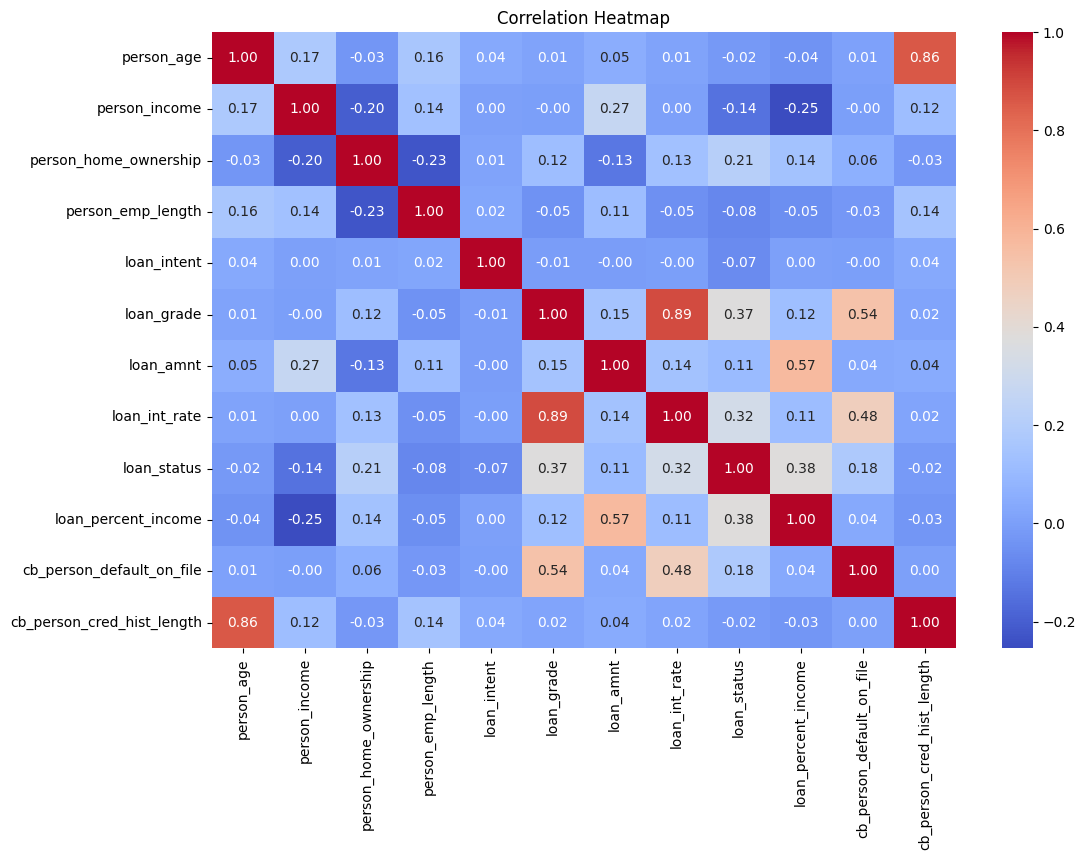

In [15]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [17]:
sns.countplot(x='loan_status', data=data, palette="Set2")
plt.title("Loan Status Distribution")
plt.show()


NameError: name 'sns' is not defined

In [17]:
print(data.columns)


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


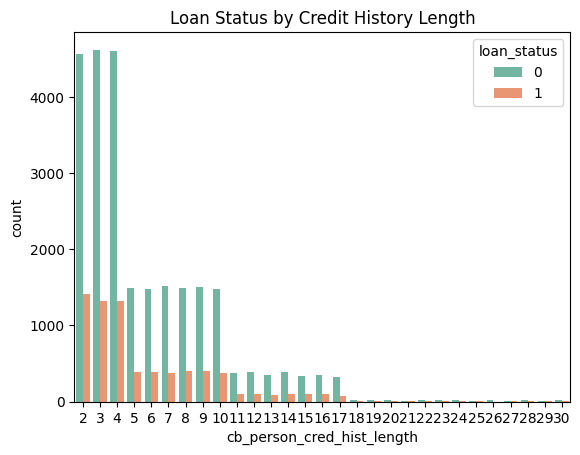

In [42]:
sns.countplot(x='cb_person_cred_hist_length', hue='loan_status', data=data, palette="Set2")
plt.title("Loan Status by Credit History Length")
plt.show()


In [18]:
import numpy as np

new_applicant = np.array([[30, 50000, 5, 20000, 12.5, 0.2,
                           1, 2, 3, 0, 10]])  
prediction = log_reg_balanced.predict(new_applicant)[0]

if prediction == 1:
    print("Loan Approved")
else:
    print(" Loan Not Approved")


Loan Approved
